# Plotting a pourbaix diagram using the Materials Project API

*If you use this infrastructure, please consider citing the following work:*

[K. A. Persson, B. Waldwick, P. Lazic and G. Ceder, Phys. Rev. B, 2012, 85, 235438.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.85.235438)

[A. K. Singh, L. Zhou, A. Shinde, S. K. Suram, J. H. Montoya, D. Winston, J. M. Gregoire and K. A. Persson, Chem. Mater., 2017, DOI: acs.chemmater.7b03980.](http://pubs.acs.org/doi/10.1021/acs.chemmater.7b03980)

**Notebook Author:** Joseph Montoya

----------

The Materials Project REST interface includes functionality to construct pourbaix diagrams from computed entries.  Note that the Pourbaix infrastructure is still undergoing revision, but now includes a simplified interface that enables MP and pymatgen users to fetch entries that have been processed according to the [Materials Project Aqueous Compatibility scheme](http://pymatgen.org/_modules/pymatgen/entries/compatibility.html).  Thus, users can reproduce web Pourbaix diagrams in two or three steps in pymatgen.

In [1]:
# Import necessary tools from pymatgen
from pymatgen import MPRester
from pymatgen.analysis.pourbaix.maker import PourbaixDiagram
from pymatgen.analysis.pourbaix.analyzer import PourbaixAnalyzer
from pymatgen.analysis.pourbaix.plotter import PourbaixPlotter
%matplotlib inline

# Initialize the MP Rester
mpr = MPRester()

To retrieve entries necessary to construct a Pourbaix Diagram use `MPRester.get_pourbaix_entries(LIST_OF_ENTRIES)` with a list of entries comprising your chemical system.  It is not necessary to include 'O' and 'H' in your list, as they are added automatically.  This function also contains all of necessary preprocessing to ensure the PourbaixEntries are compatible with the pymatgen PourbaixDiagram constructor.

In [2]:
# Get all pourbaix entries corresponding to the Fe-O-H chemical system.
entries = mpr.get_pourbaix_entries(["Cu"])

Pourbaix diagrams can be constructed using `PourbaixDiagram(RETRIEVED_ENTRIES)` as below.  Note that a `comp_dict` keyword argument may also be supplied to the `PourbaixDiagram` constructor if a fixed composition for a multi-element pourbaix diagram is desired.

In [3]:
# Construct the PourbaixDiagram object
pd = PourbaixDiagram(entries)

The `PourbaixAnalyzer` includes a number of useful functions for determining stable species and stability of entries relative to a given pourbaix facet (i.e. as a function of pH and V).

In [4]:
# Construct the pourbaix analyzer
pa = PourbaixAnalyzer(pd)

# Get an entry stability as a function of pH and V
entry = [e for e in entries if e.entry_id == 'mp-1692'][0]
print("CuO's potential energy per atom relative to the most",
      "stable decomposition product is {} eV/atom".format(
          pa.get_entry_stability(entry, pH=7, V=-0.2)))

CuO's potential energy per atom relative to the most stable decomposition product is 0.4404188837500014 eV/atom


This suggests that CuO, for example, has a large driving force for decomposition at neutral pH and mildly reducing conditions.

To see this in more detail, we can plot the pourbaix diagram.  The `PourbaixPlotter` object is also initialized using an instance of the `PourbaixDiagram` object.

In [5]:
plotter = PourbaixPlotter(pd)

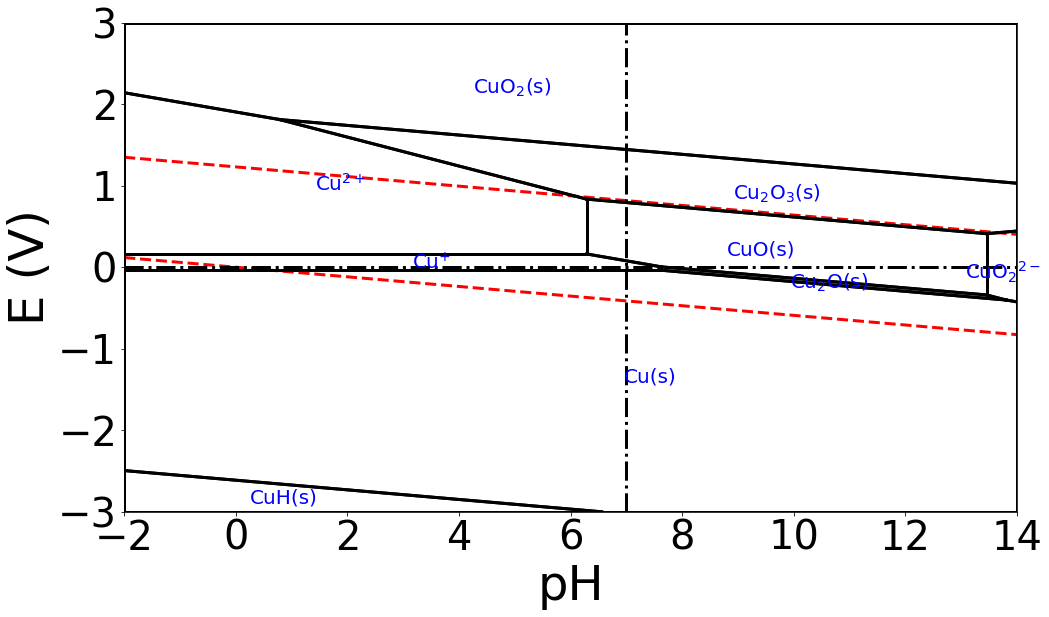

In [6]:
plotter.get_pourbaix_plot().show()

The PourbaixPlotter object can also plot the relative stability of an entry across the pourbaix diagram.  To do this, use the PourbaixPlotter.plot_entry_stability method.

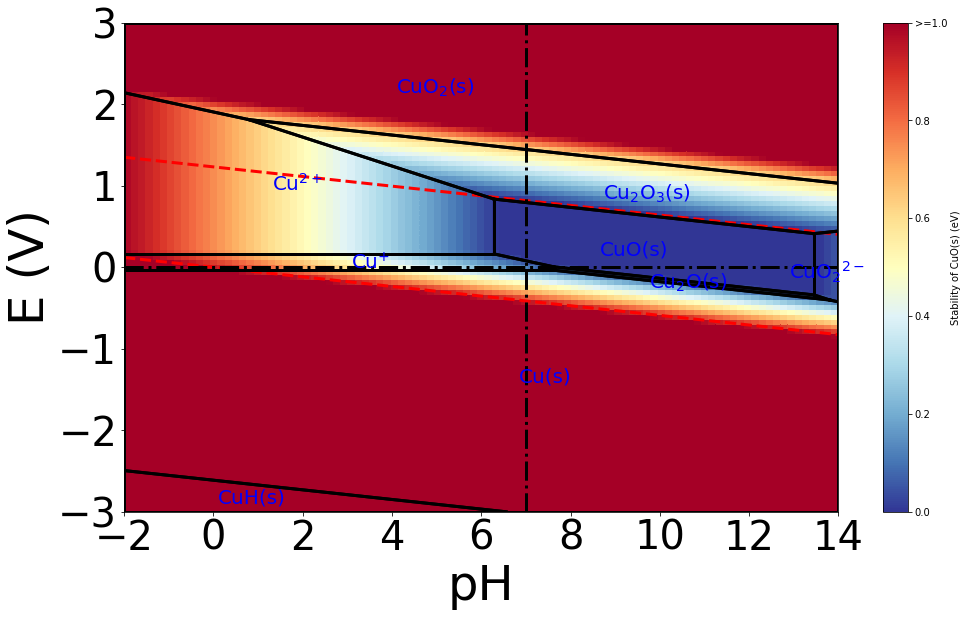

In [7]:
plt = plotter.plot_entry_stability(entry)
plt.show()